In [1]:
import pandas as pd
import re
from datetime import datetime
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_rows', None)


In [70]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', 15)

In [2]:

df = pd.read_excel("ODI-2023.xlsx")


In [13]:
# df = pd.read_excel("ODI-2023.xlsx")
df.rename(columns = {'What programme are you in?':'programme',
                        'Have you taken a course on machine learning?':'course ML',
                        'Have you taken a course on information retrieval?':'course retrieval',
                        'Have you taken a course on statistics?':'course statistics',
                        'Have you taken a course on databases?':'course databases',
                        'What is your gender?':'gender',
                        'I have used ChatGPT to help me with some of my study assignments ':'ChatGPT',
                        'When is your birthday (date)?':'birthday',
                        'How many students do you estimate there are in the room?':'students in room',
                        'Did you stand up to come to your previous answer    ?':'prev answer stand',
                        'What is your stress level (0-100)?':'stress level',
                        'How many hours per week do you do sports (in whole hours)? ':'sports per week',
                        'Give a random number':'random number',
                        'Time you went to bed Yesterday':'bed time',
                        'What makes a good day for you (1)?':'good day_(1)',
                        'What makes a good day for you (2)?':'good day_(2)'}, inplace = True)

In [5]:
df

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,I have used ChatGPT to help me with some of my study assignments,When is your birthday (date)?,How many students do you estimate there are in the room?,Did you stand up to come to your previous answer ?,What is your stress level (0-100)?,How many hours per week do you do sports (in whole hours)?,Give a random number,Time you went to bed Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,2023-04-04 12:08:33.342,Masters - AI,yes,0,mu,nee,gender fluid,yes,23/11/1997,319,unknown,100,0,69,11:30,Ashes,Not ashes
1,2023-04-04 12:08:36.017,Artificial Intelligence,no,0,sigma,nee,male,not willing to say,"5th August, 1995",600,no,60,2,42,23.00,good food,good sleep
2,2023-04-04 12:08:37.501,AI,no,0,mu,nee,female,no,21/09,220,no,20,5,17,23:30,Sports,Friends
3,2023-04-04 12:08:51.909,Data mining,yes,1,mu,ja,male,yes,25-06-1996,100,unknown,50,5,12,11,Gym,Piano
4,2023-04-04 12:08:59.019,Quantitative Risk Management,no,0,mu,nee,male,yes,18-08-1998,300,no,65,10,874,11,Relax,Sun
5,2023-04-04 12:08:59.153,Business Analytics,yes,0,mu,ja,female,yes,13-03-2000,500,no,80,5,13,12am,Coffee,Sunny weather
6,2023-04-04 12:09:02.275,M.S. Artificial Intelligence,yes,0,mu,ja,male,yes,1999-07-21,150,no,100,7,27,23:00,Good code,Good code
7,2023-04-04 12:09:12.129,Artificial Intelligence,yes,1,mu,ja,male,yes,08-03-2000,600,no,30,4,8,00:00,When the sun shines,If I am able to sport
8,2023-04-04 12:09:14.858,Computational Science,no,0,unknown,nee,male,not willing to say,24-11-1996,525,no,65,5,3.14,2230,Expierence,Expierence
9,2023-04-04 12:09:17.895,Master of Quantitative Risk Management,no,1,mu,ja,female,not willing to say,07.12.1998,570,no,70,6,777,00:00,Experience a serotonin molecule,Experience another serotonin molecule


In [23]:
df.loc[[12, 254, 226, 171, 54]]

,Tijdstempel,programme,course ML,course retrieval,course statistics,course databases,gender,ChatGPT,birthday,students in room,prev answer stand,stress level,sports per week,random number,bed time,good day_(1),good day_(2)
12,2023-04-04 1...,Artificial ...,yes,1,mu,ja,male,yes,00-00-0000,-6382,yes,-100,Nadda,696969,4 am,Netflix and,Chill
254,2023-04-04 1...,High school...,yes,1,mu,ja,male,yes,30-2-2017,436,no,Np.inf,Y = 5x + 3,RandomStrea...,I didnt,Saturday,Sunday
226,2023-04-04 1...,Bioinformatics,yes,0,mu,ja,female,not willing...,30-12-20000...,183,no,-420,8-10,4579,1am,Seeing friends,Doing somet...
171,2023-04-04 1...,Bioinformatics,yes,0,sigma,nee,female,yes,1220,400,yes,100000000000,0,9,12:30,good food,excellent p...
54,2023-04-04 1...,Computer sc...,no,0,mu,ja,female,not willing...,12-06-1998,300,no,99,5-6,22,1:40,Good food,Biking


In [17]:
pd.set_option('display.width', None)

df[12,254,226,171,54]

KeyError: (12, 254, 226, 171, 54)

In [55]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Tijdstempel        305 non-null    datetime64[ns]
 1   programme          305 non-null    object        
 2   course_ML          305 non-null    object        
 3   course_retrieval   305 non-null    object        
 4   course_statistics  305 non-null    object        
 5   course_databases   305 non-null    object        
 6   gender             305 non-null    object        
 7   ChatGPT            305 non-null    object        
 8   birthday           305 non-null    object        
 9   students_in_room   305 non-null    object        
 10  prev_answer_stand  305 non-null    object        
 11  stress_level       304 non-null    object        
 12  sports_per_week    305 non-null    object        
 13  random_number      305 non-null    object        
 14  bed_time  

In [4]:
months = {'january': 1,'jan': 1,'february': 2,'feb': 2,'march': 3,'april': 4,'may': 5,'june': 6,'july': 7,
    'august': 8 ,'september': 9,'sept': 9,'october': 10,'november': 11,'december': 12,'th': "",'nd':"",'fr':"",'bc':''}    

In [5]:
# correct "When is your birthday (date)?" column

birthday  = df["birthday"]
for x in range(len(birthday)):
    birthday[x] = str(birthday[x]).lower()
    for i in months:
        if i in birthday[x]:
            birthday[x] = birthday[x].replace(i,str(months[i]))
    temp = ""
    for y in range(len(birthday[x])):
        if not birthday[x][y].isalpha() and not birthday[x][y].isdigit():
            temp += " "
        else:
            temp += birthday[x][y]
    birthday[x] = temp.strip()
    if len(birthday[x])<8 or len(birthday[x])>10 or birthday[x].count(" ")!=2:
        birthday[x] = "NaN"
    
    birthday[x]= birthday[x].split(" ")
    
for i in range(len(birthday)):
    if len(str(birthday[i][0]))==4:
        birthday[i][0],birthday[i][-1]=birthday[i][-1],birthday[i][0]
    
    if not birthday[i][-1] == "NaN":
        if int(birthday[i][-1]) < 1950:
            birthday[i] = ["NaN"]
            
for i in range(len(birthday)):
    birthday[i] = " ".join([str(elem) for elem in birthday[i]])
    
# df['When is your birthday (date)?'] = pd.to_datetime(df['When is your birthday (date)?'], format='%d %m %Y')


In [6]:
# correct "What is your stress level (0-100)?" column

for index, row in df.iterrows():
    stress_level = str(row['stress_level'])    

    if not stress_level.isdigit() or int(stress_level) < 0 or int(stress_level) > 100:
        df['stress_level'][index] = "NaN"

In [7]:
# replace the levels of the words with numbers
row_values={"yes":1, "no":0 , "mu":1 , "sigma":0, "ja":1, "nee":0, "unknown":"NaN",
           "male":1, "female":2, "intersex":3, "nonbinary":4, "non-binary":4, "gender fluid":5, "other":6,
            "not willing to answer":7,"not willing to say":8}

for key, value in df.iteritems():
    for ele in range(len(value)):
        if value[ele] in row_values.keys():
            value[ele] = row_values[value[ele]]   

In [8]:
# correct "How many students do you estimate there are in the room?" column

for index, row in df.iterrows():
    students_num = str(row['students_in_room'])
    numbers = r'^[10-1000]$'
    if not students_num.isdigit() or int(students_num) < 10 or int(students_num) > 1000:
        df['students_in_room'][index] = "NaN"

In [9]:
# correct "How many hours per week do you do sports (in whole hours)? " 

# remove the characters
for index, row in df.iterrows():
    students_num = str(row["sports_per_week"])
    numbers = r'^[0-9]{1,3}\W[0-9]{1,3}$'     
    if re.search(numbers, students_num): 
        if "-" in students_num:
            indx = students_num.index('-')
            students_num = str(int((int(students_num[:indx:]) + int(students_num[indx+1::]))/2))
            df["sports_per_week"][index] = students_num
            pass
        if "/" in students_num:
            indx = students_num.index('/')
            students_num = str(int(students_num[:indx:]) + int(students_num[indx+1::]))
            df["sports_per_week"][index] = students_num
            pass
        else:
            df["sports_per_week"][index] = str(int(float(students_num)))
            pass

# remove the words
for index, row in df.iterrows():
    temp = ""
    students_hours = str(row["sports_per_week"])
    for y in range(len(students_hours)):
        if not students_hours[y].isdigit():
            temp += ""
        else:
            temp += students_hours[y]  
        df["sports_per_week"][index] = temp.strip()            
# replace empty string and stranges numbers with non
for index, row in df.iterrows():
    students_hours = str(row["sports_per_week"])
    if not students_hours.isdigit() or int(students_hours) < 0 or int(students_hours) > 150:
        df["sports_per_week"][index] = "NaN"


In [10]:
# remove the words
for index, row in df.iterrows():
    temp = ""
    bed_time = str(row['bed_time'])
    for y in range(len(bed_time)):
        if not bed_time[y].isdigit():
            temp += " "
        else:
            temp += bed_time[y]  
        df['bed_time'][index] = temp.strip()
        
# make the same format
for index, row in df.iterrows():
    bed_time = str(row['bed_time']).strip()
    
    if len(bed_time) ==5:
        bed_time=bed_time[:2:]+":"+bed_time[3::]
        df['bed_time'][index] = bed_time
        
    if len(bed_time) ==4:
        bed_time=bed_time[:2:]+":"+bed_time[2::]
        df['bed_time'][index] = bed_time
        
    if len(bed_time) ==2:
        temp= bed_time + ":00"
        df['bed_time'][index] = temp

    if len(bed_time) ==1:
        temp= "0"+ bed_time + ":00"
        df['bed_time'][index] = temp  
        
    if len(bed_time) ==0:
        df['bed_time'][index] = "NaN"         
        
for index, row in df.iterrows():
    df['bed_time'][index]=df['bed_time'][index].replace("12","00")
    df['bed_time'][index]=df['bed_time'][index].replace("24","00")
    df['bed_time'][index]=df['bed_time'][index].replace("11","23")
    
df['bed_time'] = df['bed_time'].str.replace(' ', '')
df['bed_time'] = pd.to_datetime(df['bed_time'], format='%H:%M')
df['bed_time'] = df['bed_time'].dt.time

In [11]:
courses = {'artificial intelligence': "AI",
          'ai': "AI",
           'artif': "AI",
          "quantitative risk management":"QRM",
          'business analytics': "BA",
           'ba': "BA",
           "finance":"Finance",
           
           "computer science":"CS",
           "cs":"CS",
           
           "information sciences":"Info Sci",
           "info sci":"Info Sci",

           "computational science":"Comp Sci",
           "comp sci":"Comp Sci",
           
           "biomedical sciences":"Bio Sci",
           "bio sci":"Bio Sci",
           "phd":"PHD",
           "exchange":"Exch",
           "high school 3rd grade":"3rd Gr",
           "big data engineering":"Data Eng",
           "big data eng":"Data Eng",
           "digital business":"Digi Bus",
           "human language":"Hum Lang Tech",
           "cls":"CLS",
           "neuroscience":"Neur sci",
           "data mining":"Data Mining",
           "qrm":"QRM",
           "policy analysis":"P Analysis"       

          } 

In [12]:
for index, row in df.iterrows():
    df['programme'][index]=str(df['programme'][index]).lower()

for index, row in df.iterrows():
     for i in courses:
        if i in df['programme'][index]:            
            df['programme'][index] = courses[i]
            
for index, row in df.iterrows(): 
    if not df['programme'][index] in courses.values():
        df['programme'][index] = "NaN"

In [13]:
# calculat age 


# Convert the column to a Timestamp object
df['birthday'] = pd.to_datetime(df['birthday'], format='%d %m %Y', errors='coerce')

# Calculate the age in years
now = datetime.now()
df['age'] = (now - df['birthday']) // pd.Timedelta(days=365.25)
df.insert(9, 'age', df.pop('age'))


In [14]:
# get the second last row
second_last_row = df.iloc[-2]
# drop the second last row
df = df.drop(df.index[-2])
# insert the second last row as the first row
df = pd.concat([second_last_row.to_frame().T, df], ignore_index=True)

In [15]:
df.to_csv('new_data_before_miss_value.csv', index=False)
df.to_excel('new_data_before_miss_value.xlsx', index=False)


In [16]:
# df['What programme are you in?'].nunique()

In [17]:
df = pd.read_csv("new_data_before_miss_value.csv")

In [18]:
df.nunique()

Tijdstempel          302
programme             18
course_ML              2
course_retrieval       2
course_statistics      2
course_databases       2
gender                 6
ChatGPT                3
birthday             204
age                   16
students_in_room      99
prev_answer_stand      2
stress_level          56
sports_per_week       17
random_number        137
bed_time              47
good_day_(1)         209
good_day_(2)         246
dtype: int64

In [19]:
df.isnull().sum(axis = 0)

Tijdstempel           0
programme             5
course_ML             3
course_retrieval     23
course_statistics    16
course_databases      1
gender                0
ChatGPT               0
birthday             83
age                  83
students_in_room      8
prev_answer_stand    12
stress_level         21
sports_per_week       5
random_number         0
bed_time             11
good_day_(1)          0
good_day_(2)          1
dtype: int64

In [20]:
# full the missing valuse
for columnName, columnData in df.iteritems():
    # Check if the data type of the column is numeric
    if df[columnName].dtype != 'object':
        # If the data type is numeric, interpolate and round the column
        df[columnName] = df[columnName].interpolate(method='linear').round()
    else:
        # Replace missing values with the mode of the column
        mode = df[columnName].mode()[0]
        df[columnName].fillna(mode, inplace=True)

In [21]:
df.isnull().sum(axis = 0)

Tijdstempel          0
programme            0
course_ML            0
course_retrieval     0
course_statistics    0
course_databases     0
gender               0
ChatGPT              0
birthday             0
age                  0
students_in_room     0
prev_answer_stand    0
stress_level         0
sports_per_week      0
random_number        0
bed_time             0
good_day_(1)         0
good_day_(2)         0
dtype: int64

In [22]:
df.nunique()

Tijdstempel          302
programme             18
course_ML              2
course_retrieval       2
course_statistics      2
course_databases       2
gender                 6
ChatGPT                3
birthday             204
age                   16
students_in_room     102
prev_answer_stand      2
stress_level          60
sports_per_week       17
random_number        137
bed_time              47
good_day_(1)         209
good_day_(2)         246
dtype: int64

In [23]:
# save the New_data
df.to_csv('new_data_fill_missing_linear&mode.csv', index=False)

In [24]:
df = pd.read_csv("new_data_before_miss_value.csv")


In [25]:
df.nunique()

Tijdstempel          302
programme             18
course_ML              2
course_retrieval       2
course_statistics      2
course_databases       2
gender                 6
ChatGPT                3
birthday             204
age                   16
students_in_room      99
prev_answer_stand      2
stress_level          56
sports_per_week       17
random_number        137
bed_time              47
good_day_(1)         209
good_day_(2)         246
dtype: int64

In [26]:
df.isnull().sum(axis = 0)

Tijdstempel           0
programme             5
course_ML             3
course_retrieval     23
course_statistics    16
course_databases      1
gender                0
ChatGPT               0
birthday             83
age                  83
students_in_room      8
prev_answer_stand    12
stress_level         21
sports_per_week       5
random_number         0
bed_time             11
good_day_(1)          0
good_day_(2)          1
dtype: int64

In [27]:
# fill with prevous row values
df = df.fillna(method='pad')

In [28]:
df.nunique()

Tijdstempel          302
programme             18
course_ML              2
course_retrieval       2
course_statistics      2
course_databases       2
gender                 6
ChatGPT                3
birthday             204
age                   16
students_in_room      99
prev_answer_stand      2
stress_level          56
sports_per_week       17
random_number        137
bed_time              47
good_day_(1)         209
good_day_(2)         246
dtype: int64

In [29]:
df.isnull().sum(axis = 0)

Tijdstempel          0
programme            0
course_ML            0
course_retrieval     0
course_statistics    0
course_databases     0
gender               0
ChatGPT              0
birthday             0
age                  0
students_in_room     0
prev_answer_stand    0
stress_level         0
sports_per_week      0
random_number        0
bed_time             0
good_day_(1)         0
good_day_(2)         0
dtype: int64

In [30]:
# save the New_data
df.to_csv('new_data_fill_missing_with_previous_row.csv', index=False)

# Task 1A_b


In [87]:
df = pd.read_csv('new_data_before_miss_value.csv')


In [33]:
# df.rename(columns = {'What programme are you in?':'programme',
#                         'Have you taken a course on machine learning?':'course_ML',
#                         'Have you taken a course on information retrieval?':'course_retrieval',
#                         'Have you taken a course on statistics?':'course_statistics',
#                         'Have you taken a course on databases?':'course_databases',
#                         'What is your gender?':'gender',
#                         'I have used ChatGPT to help me with some of my study assignments ':'ChatGPT',
#                         'When is your birthday (date)?':'birthday',
#                         'How many students do you estimate there are in the room?':'students_in_room',
#                         'Did you stand up to come to your previous answer    ?':'prev_answer_stand',
#                         'What is your stress level (0-100)?':'stress_level',
#                         'How many hours per week do you do sports (in whole hours)? ':'sports_per_week',
#                         'Give a random number':'random_number',
#                         'Time you went to bed Yesterday':'bed_time',
#                         'What makes a good day for you (1)?':'good_dat_(1)',
#                         'What makes a good day for you (2)?':'good_dat_(2)'}, inplace = True)

AxesSubplot(0.125,0.11;0.62x0.77)


Text(0.5, 1.0, 'missing Values')

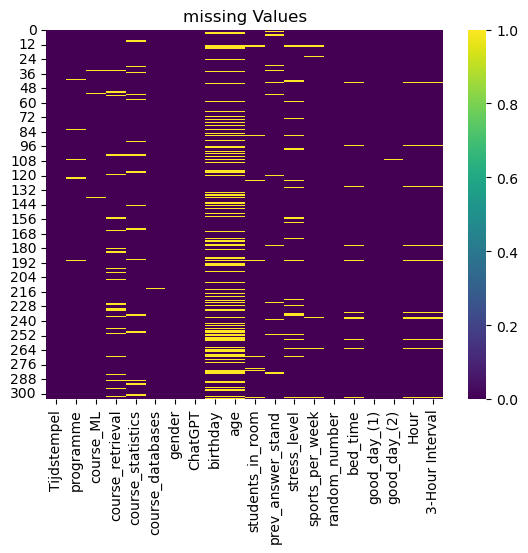

In [100]:

# Create a heatmap to visualize the missing values
plt = sns.heatmap(df.isnull(), cmap='viridis')#,xticklabels = [f"column {i}" for i in range(len(df.columns))])
plt.set_title('missing Values')


Text(0.5, 23.38159722222222, 'Features')

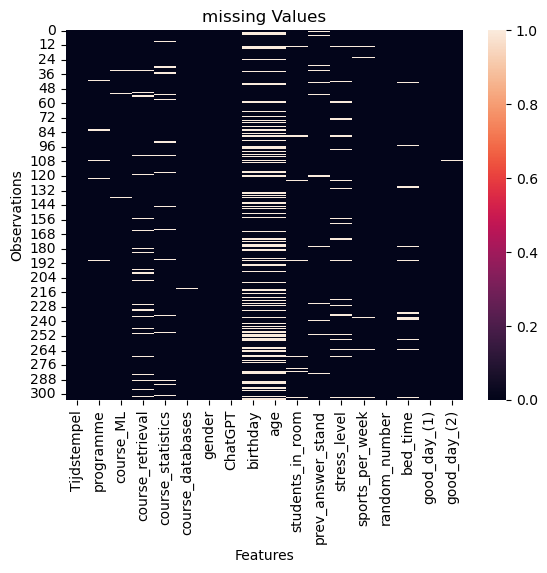

In [32]:
plt = sns.heatmap(df.isnull())
plt.set_title('missing Values')
plt.set_ylabel('Observations')
plt.set_xlabel('Features')

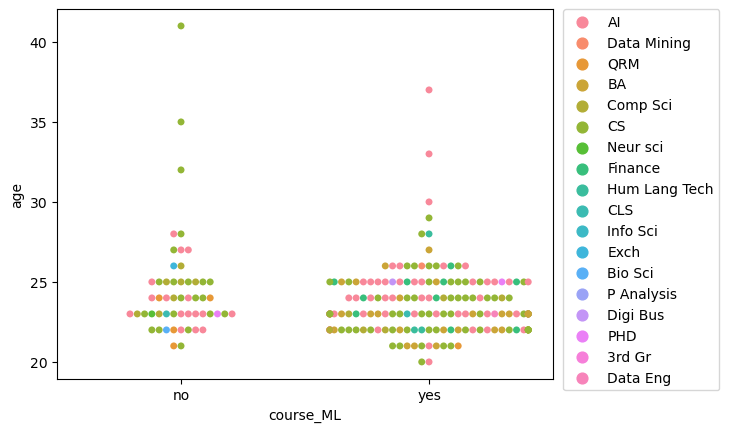

In [33]:
x = sns.swarmplot(data=df, x=df['course_ML'],y=df["age"],hue=df["programme"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
x.set_xticklabels(["no","yes"]);

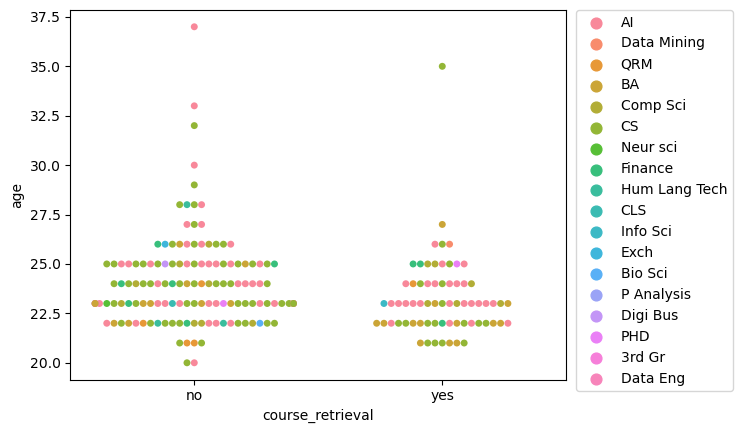

In [34]:
x = sns.swarmplot(data=df, x=df['course_retrieval'],y=df["age"],hue=df["programme"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
x.set_xticklabels(["no","yes"]);

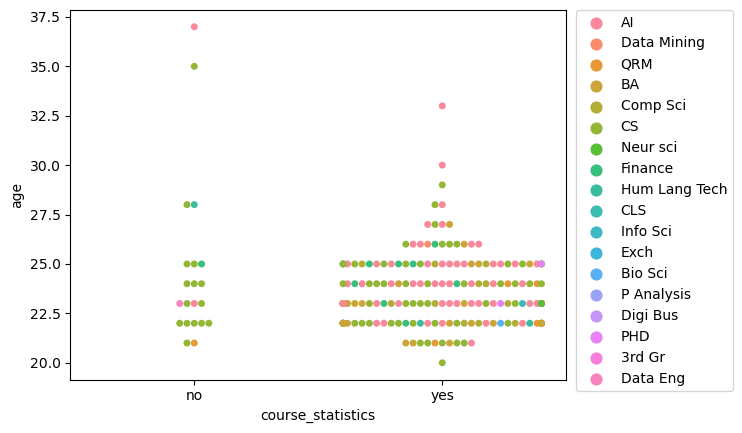

In [35]:
x = sns.swarmplot(data=df, x=df['course_statistics'],y=df["age"],hue=df["programme"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
x.set_xticklabels(["no","yes"]);


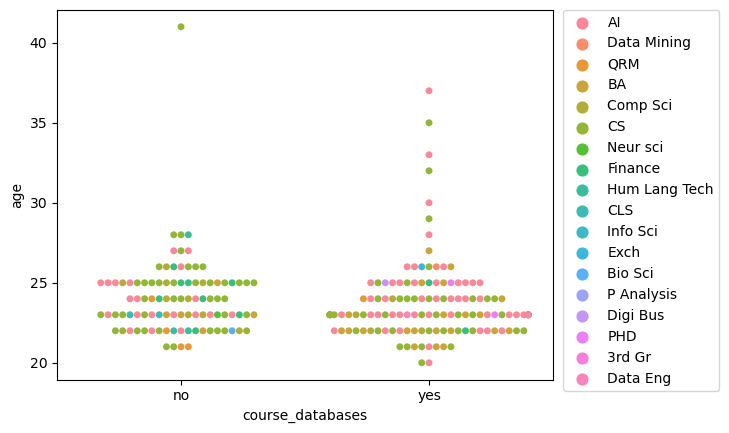

In [36]:
x = sns.swarmplot(data=df, x=df['course_databases'],y=df["age"],hue=df["programme"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
x.set_xticklabels(["no","yes"]);

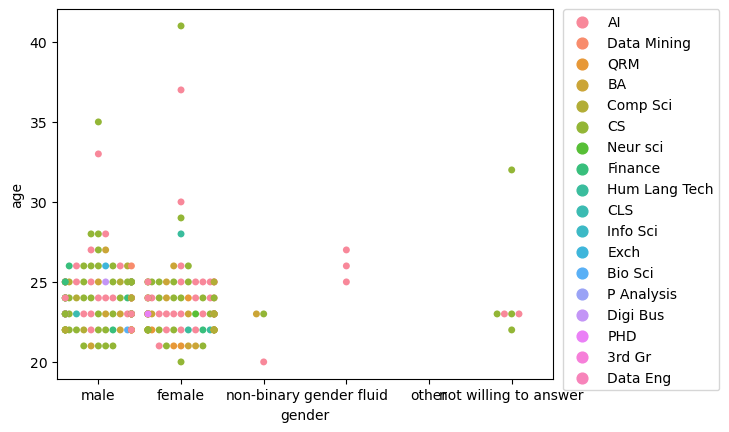

In [37]:
x = sns.swarmplot(data=df, x=df['gender'],y=df["age"],hue=df["programme"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
x.set_xticklabels(["male", "female", "non-binary", "gender fluid", "other", "not willing to answer"]);

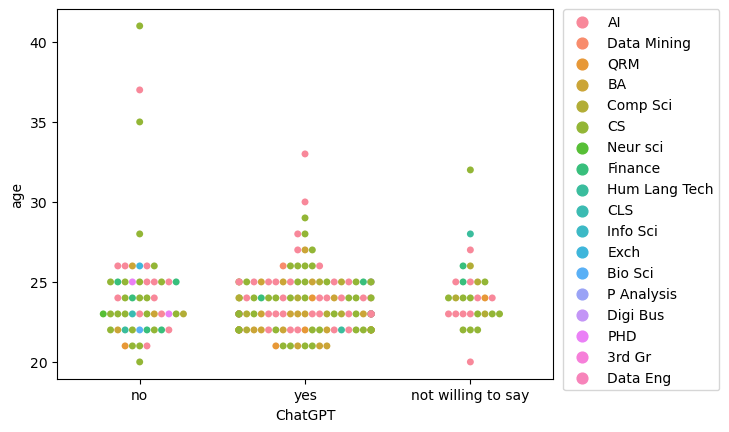

In [38]:
x = sns.swarmplot(data=df, x=df['ChatGPT'],y=df["age"],hue=df["programme"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
x.set_xticklabels(["no","yes",'not willing to say']);

In [88]:

# Create a dataframe with a column of strings representing times
# df = pd.DataFrame({'Time you went to bed Yesterday': ['2023-04-07 23:00:00', '2023-04-07 22:00:00', '2023-04-07 21:00:00']})

# Convert the column to a datetime-like object
df['bed_time'] = pd.to_datetime(df['bed_time'])

# Extract the hour using the .dt accessor
df['Hour'] = df['bed_time'].dt.hour

df['3-Hour Interval'] = pd.cut(df['Hour'], bins=8, labels=['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24'])


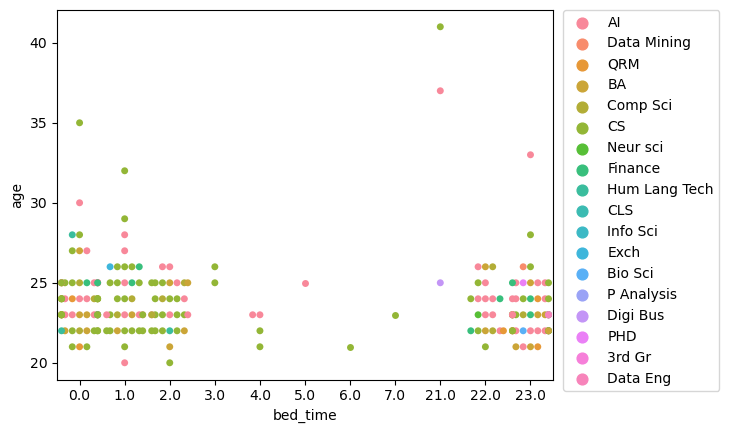

In [40]:
#Time you went to bed Yesterday
x = sns.swarmplot(data=df, x=df['bed_time'].dt.hour,y=df["age"],hue=df["programme"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

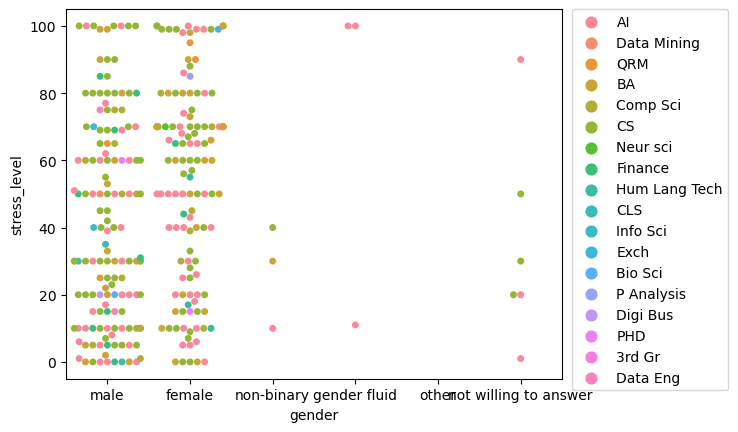

In [41]:
x = sns.swarmplot(data=df, x=df['gender'],y=df["stress_level"],hue=df["programme"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
x.set_xticklabels(["male", "female", "non-binary", "gender fluid", "other", "not willing to answer"]);

In [45]:
# x = sns.swarmplot(data=df, y=df['Hour'],x=df["What is your stress level (0-100)?"],hue=df["What programme are you in?"])
# x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

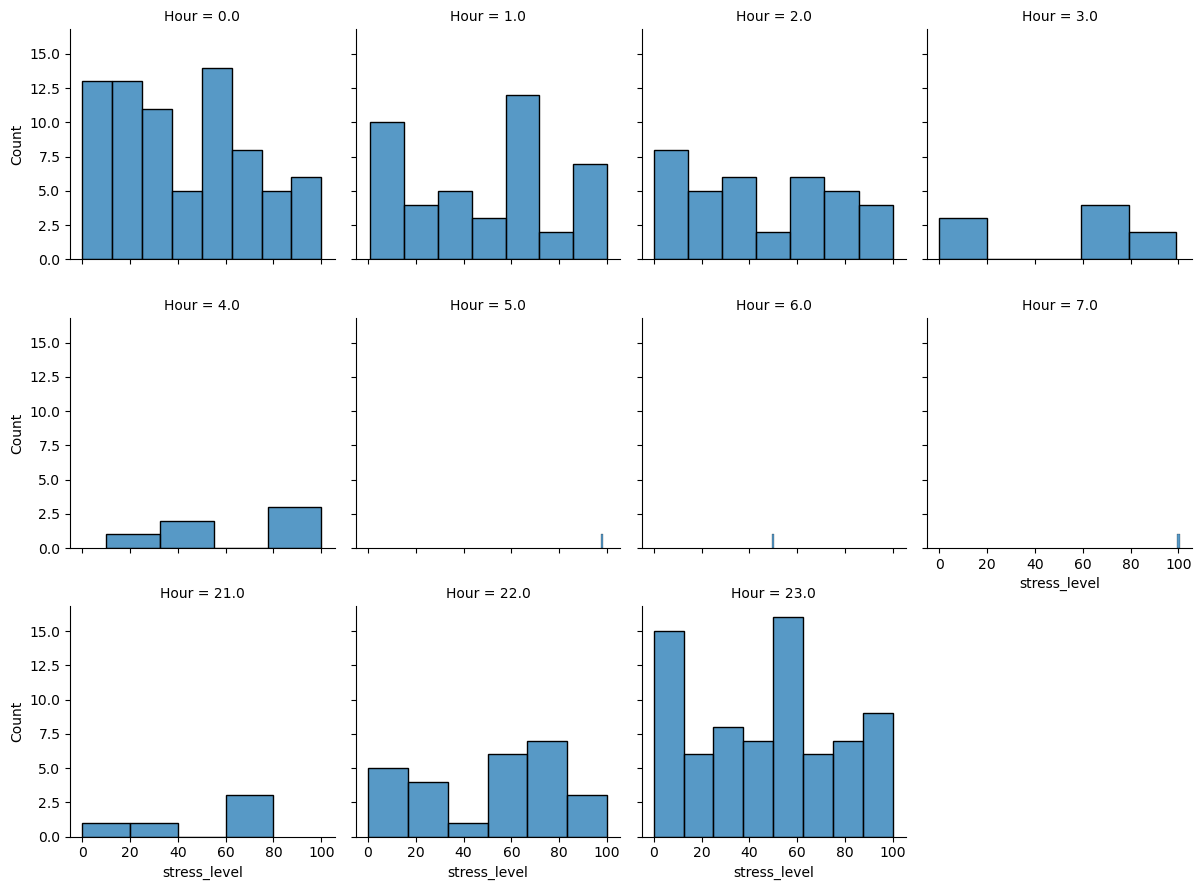

In [73]:
g = sns.FacetGrid(df, col="Hour", col_wrap=4)
g.map(sns.histplot, "stress_level")

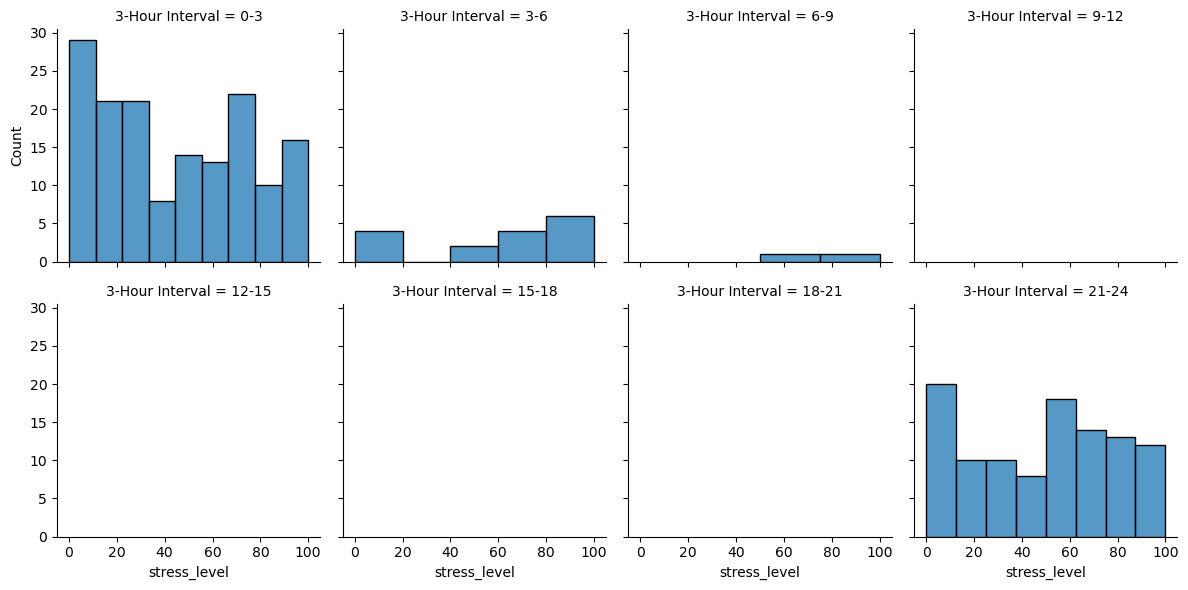

In [74]:
g = sns.FacetGrid(df, col="3-Hour Interval", col_wrap=4)
g.map(sns.histplot, "stress_level")

In [94]:
df['3-Hour Interval'] = pd.cut(df['Hour'], bins=2, labels=['0-3', '21-24'])
grouped = df.groupby("3-Hour Interval")["stress_level"].agg(["mean", "median", "std"])
print(grouped)

                      mean  median        std
3-Hour Interval                              
0-3              46.354651    47.5  31.286954
21-24            48.342857    50.0  30.935674


                      mean  median        std
3-Hour Interval                              
0-3              46.354651    47.5  31.286954
21-24            48.342857    50.0  30.935674


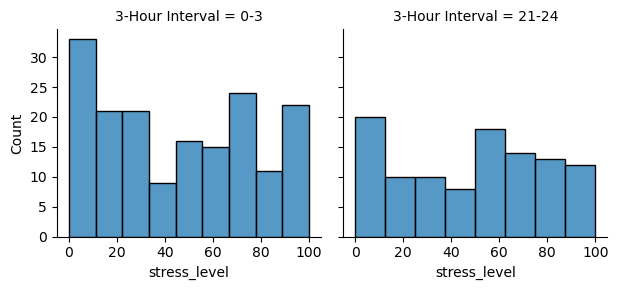

In [96]:
# Convert the column to a datetime-like object
df['bed_time'] = pd.to_datetime(df['bed_time'])

# Extract the hour using the .dt accessor
df['Hour'] = df['bed_time'].dt.hour

df['3-Hour Interval'] = pd.cut(df['Hour'], bins=2, labels=['0-3', '21-24'])
grouped = df.groupby("3-Hour Interval")["stress_level"].agg(["mean", "median", "std"])
print(grouped)
g = sns.FacetGrid(df, col="3-Hour Interval", col_wrap=4)

g.map(sns.histplot, "stress_level")

<AxesSubplot:xlabel='stress_level'>

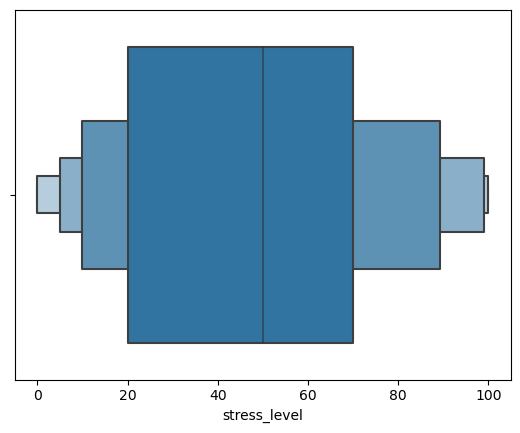

In [48]:
sns.boxenplot(df["stress_level"],)

<AxesSubplot:xlabel='stress_level', ylabel='Density'>

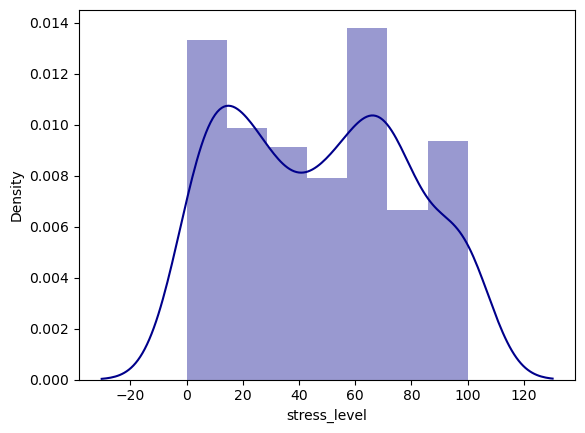

In [49]:
sns.distplot(df["stress_level"],color='darkblue')

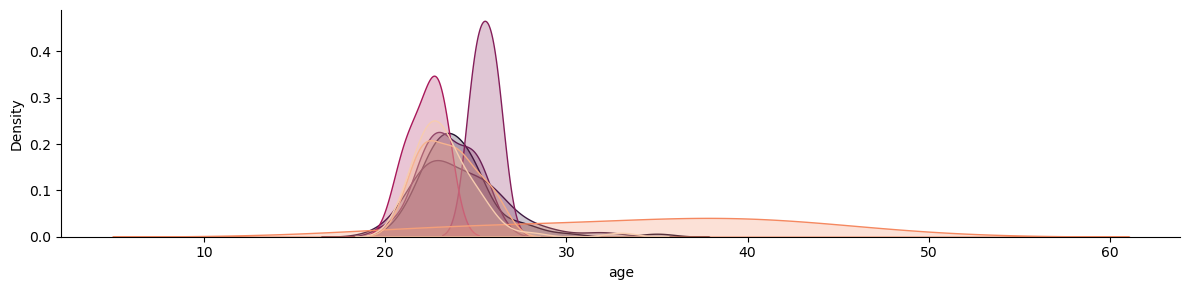

In [50]:
df = df.dropna(subset=['Hour'])
fig = sns.FacetGrid(df, hue='Hour', aspect=4, palette='rocket')
fig.map(sns.kdeplot, 'age', shade=True)

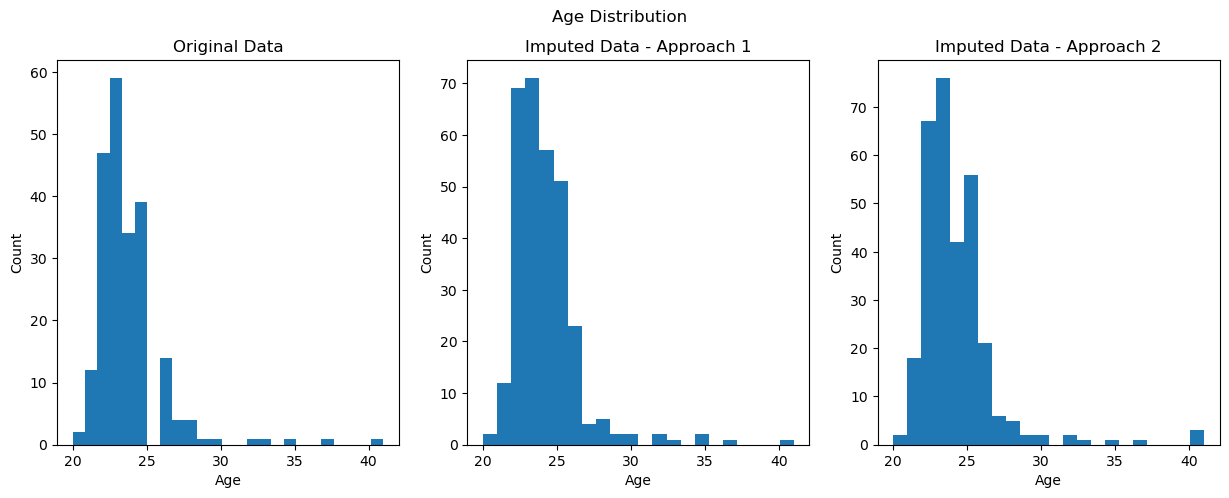

In [38]:
# Load data from CSV file
df = pd.read_csv('new_data_before_miss_value.csv')
df_1 = pd.read_csv('new_data_fill_missing_linear&mode.csv')
df_2 = pd.read_csv('new_data_fill_missing_with_previous_row.csv')

# Histogram of original and imputed datasets
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
df['age'].plot(kind='hist', ax=axs[0], title='Original Data', bins=25)
df_1['age'].plot(kind='hist', ax=axs[1], title='Imputed Data - Approach 1', bins=22)
df_2['age'].plot(kind='hist', ax=axs[2], title='Imputed Data - Approach 2', bins=22)

# Set the plot title and axis labels
fig.suptitle('Age Distribution')
for ax in axs:
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')
    
# Show the plot
plt.show()


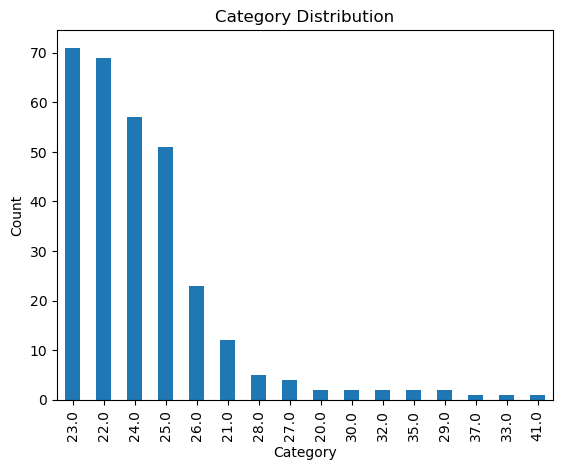

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv('new_data_fill_missing_linear&mode.csv')

# Create a bar chart of the 'category' column
df['age'].value_counts().plot(kind='bar')

# Set the plot title and axis labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

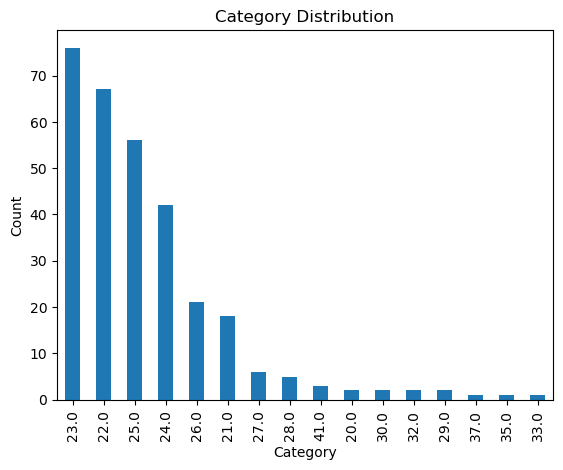

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv('new_data_fill_missing_with_previous_row.csv')

# Create a bar chart of the 'category' column
df['age'].value_counts().plot(kind='bar')

# Set the plot title and axis labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
df_original = pd.read_csv('.csv')
df_imputed_1 = pd.read_csv('new_data_fill_missing_linear&mode.csv')
df_imputed_2 = pd.read_csv('new_data_fill_missing_with_previous_row.csv')


Descriptive Statistics:
Original Data:
         course_ML  course_retrieval  course_statistics  course_databases  \
count  302.000000        282.000000         289.000000        304.000000   
mean     0.731788          0.329787           0.896194          0.552632   
std      0.443764          0.470972           0.305538          0.498042   
min      0.000000          0.000000           0.000000          0.000000   
25%      0.000000          0.000000           1.000000          0.000000   
50%      1.000000          0.000000           1.000000          1.000000   
75%      1.000000          1.000000           1.000000          1.000000   
max      1.000000          1.000000           1.000000          1.000000   

           gender     ChatGPT         age  students_in_room  \
count  305.000000  305.000000  222.000000        297.000000   
mean     1.708197    1.678689   23.851351        357.067340   
std      1.148554    2.495068    2.482604        140.663662   
min      1.000000    0.

ConversionError: Failed to convert value(s) to axis units: array(['AI', 'AI', 'AI', 'AI', 'Data Mining', 'QRM', 'BA', 'AI', 'AI',
       'Comp Sci', 'QRM', 'AI', 'CS', 'AI', 'CS', 'CS', 'BA', 'AI', 'AI',
       'AI', 'BA', 'Neur sci', 'AI', 'Comp Sci', 'BA', 'AI', 'CS', 'CS',
       'BA', 'CS', 'AI', 'CS', 'CS', 'CS', 'CS', 'CS', 'Finance', 'AI',
       'AI', 'CS', 'AI', nan, 'CS', 'Comp Sci', 'AI', 'CS', 'CS',
       'Hum Lang Tech', 'AI', 'CS', 'CS', 'CS', 'CS', 'CS', 'Finance',
       'CS', 'CS', 'CS', 'AI', 'Finance', 'Finance', 'CLS',
       'Hum Lang Tech', 'AI', 'Comp Sci', 'Hum Lang Tech', 'Finance',
       'BA', 'AI', 'CS', 'CS', 'AI', 'CS', 'AI', 'AI', 'BA', 'BA', 'AI',
       'CS', 'CS', 'CS', 'CS', nan, 'BA', 'Comp Sci', 'AI', 'AI', 'CS',
       'BA', 'CS', 'CS', 'CS', 'Info Sci', 'Finance', 'AI', 'AI', 'AI',
       'Finance', 'AI', 'QRM', 'CS', 'CS', 'BA', 'AI', 'Comp Sci', 'AI',
       'Finance', nan, 'Finance', 'AI', 'CS', 'AI', 'AI', 'AI', 'AI',
       'BA', 'AI', 'Exch', 'CS', 'CS', 'BA', 'Comp Sci', nan, 'AI', 'CS',
       'AI', 'Comp Sci', 'AI', 'CS', 'CS', 'AI', 'CS', 'AI', 'Finance',
       'CS', 'Bio Sci', 'P Analysis', 'AI', 'Comp Sci', 'CS', 'QRM', 'AI',
       'AI', 'AI', 'BA', 'AI', 'AI', 'CS', 'CS', 'Comp Sci', 'BA', 'AI',
       'BA', 'BA', 'BA', 'CS', 'CLS', 'AI', 'AI', 'AI', 'Comp Sci', 'AI',
       'CS', 'CS', 'CS', 'CS', 'CS', 'CS', 'Comp Sci', 'CS', 'Digi Bus',
       'AI', 'CS', 'CS', 'CS', 'AI', 'QRM', 'CS', 'CS', 'CS', 'BA', 'CS',
       'BA', 'BA', 'AI', 'CS', 'CS', 'BA', 'AI', 'CS', nan, 'AI', 'CS',
       'CS', 'CS', 'AI', 'AI', 'AI', 'BA', 'CS', 'CS', 'AI', 'CS', 'AI',
       'Finance', 'BA', 'Comp Sci', 'CS', 'BA', 'CS', 'CS', 'CS', 'PHD',
       'Comp Sci', 'CS', 'CS', 'CS', 'CLS', 'CS', 'CS', 'CS', 'CS', 'AI',
       'AI', 'CS', 'CS', 'BA', 'CS', 'BA', 'CS', 'AI', 'AI', 'BA', 'AI',
       'AI', 'Comp Sci', 'BA', 'AI', 'AI', 'AI', 'CS', 'CS', 'BA', 'AI',
       'CS', 'AI', 'BA', 'AI', 'CS', 'CS', 'BA', 'CS', 'AI', 'CS', 'BA',
       '3rd Gr', 'CS', 'BA', 'AI', 'AI', 'AI', 'CS', 'AI', 'BA', 'CS',
       'BA', 'Data Eng', 'BA', 'BA', 'AI', 'CS', 'CS', 'Comp Sci', 'AI',
       'Comp Sci', 'Comp Sci', 'Finance', 'CS', 'PHD', 'CS', 'BA', 'CS',
       'CS', 'AI', 'CS', 'Comp Sci', 'CS', 'AI', 'BA', 'CS', 'CS', 'AI',
       'CS', 'AI', 'CS', 'AI', 'CS', 'CS', 'CS', 'CS', 'CS', 'Exch', 'CS',
       'AI', 'CS'], dtype=object)

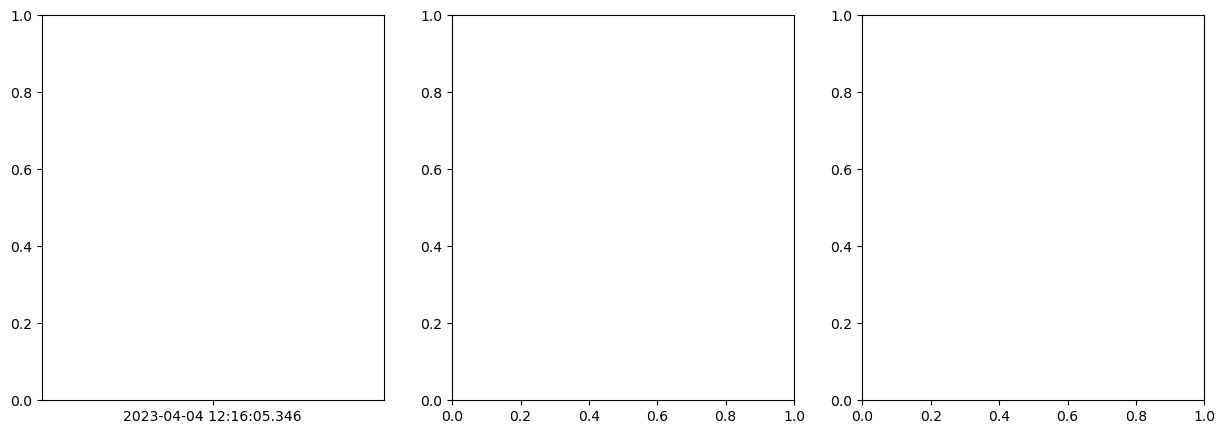

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_original = pd.read_csv('new_data_before_miss_value.csv')
df_imputed_1 = pd.read_csv('new_data_fill_missing_linear&mode.csv')
df_imputed_2 = pd.read_csv('new_data_fill_missing_with_previous_row.csv')

# Descriptive statistics of original and imputed datasets
print("Descriptive Statistics:")
print("Original Data:\n", df_original.describe())
print("\nImputed Data - Approach 1:\n", df_imputed_1.describe())
print("\nImputed Data - Approach 2:\n", df_imputed_2.describe())

# Histogram of original and imputed datasets
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(df_original)
axs[0].set_title('Original Data')
axs[1].hist(df_imputed_1)
axs[1].set_title('Imputed Data - Approach 1')
axs[2].hist(df_imputed_2)
axs[2].set_title('Imputed Data - Approach 2')
plt.show()
